### Numeric Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('F:/Education/100 Days of ML/Feature Engineering/titanic.csv',usecols=['Age','Fare','Survived'])

df.sample(5)

,Survived,Age,Fare
720,1,6.0,33.0000
780,1,13.0,7.2292
36,1,NaN,7.2292
572,1,36.0,26.3875
776,0,NaN,7.7500


In [7]:
df.isnull().mean() * 100  # missing %

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train.sample(5)

,Age,Fare
742,21.0,262.3750
300,NaN,7.7500
404,20.0,8.6625
681,27.0,76.7292
349,42.0,8.6625


In [15]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [18]:
X_train.sample(5)

,Age,Fare,Age_imputed
741,36.0,78.8500,36.0
482,50.0,8.0500,50.0
449,52.0,30.5000,52.0
295,NaN,27.7208,NaN
501,21.0,7.7500,21.0


In [19]:
X_test.sample(5)

,Age,Fare,Age_imputed
795,39.0,13.000,39.0
801,31.0,26.250,31.0
183,1.0,39.000,1.0
185,NaN,50.000,NaN
382,32.0,7.925,32.0


In [32]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [33]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [36]:
X_train['Age'].isnull().sum() # 148
X_train['Age_imputed'].isnull().sum() # 0

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


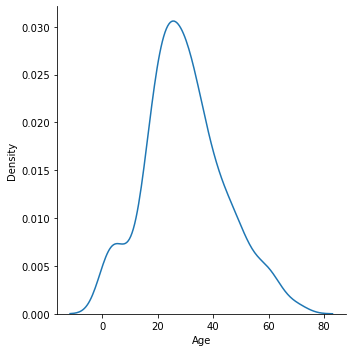

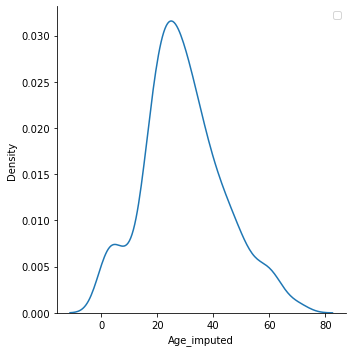

In [53]:
sns.displot(X_train['Age'], kind='kde')
sns.displot(X_train['Age_imputed'], kind='kde')

plt.legend()
plt.show()

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


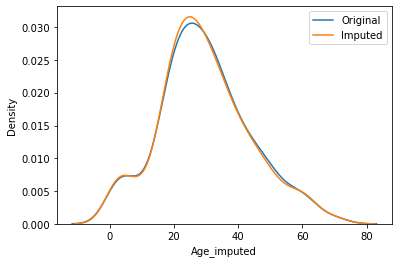

In [54]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

# Not much changes in distribution which is good

In [55]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.68121858100633


In [56]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,64.211955
Age,71.512440,204.349513,204.349513
Age_imputed,64.211955,204.349513,203.681219


<AxesSubplot:>

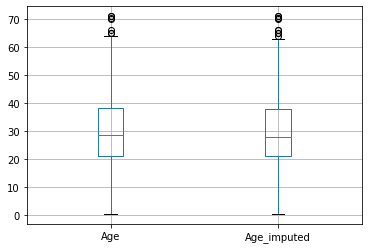

In [57]:
X_train[['Age', 'Age_imputed']].boxplot()  # No changes in outliers which is good

In [59]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare']))

### Categorical Data

In [60]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [61]:
data.sample(5)

,FireplaceQu,GarageQual,SalePrice
895,TA,TA,140000
91,NaN,TA,98600
440,Gd,TA,555000
1172,NaN,TA,171900
260,TA,TA,176000


In [63]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [64]:
X = data
y = data['SalePrice']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [67]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
621,TA,TA,240000,TA,TA
439,NaN,TA,110000,TA,NaN
1083,Gd,TA,160000,TA,Gd
132,NaN,TA,150750,TA,NaN
207,Po,TA,141000,TA,Po


In [71]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values


C:\Users\User\AppData\Local\Temp\ipykernel_4516\3051089424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values


In [94]:
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\User\AppData\Local\Temp\ipykernel_4516\1954277275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\User\AppData\Local\Temp\ipykernel_4516\1954277275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
C:\Users\User\AppData\Local\Temp\ipykernel_4516\1954277275.py:4: SettingWithCopyWarning: 
A v

In [95]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [96]:
temp # Not much changes

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.038527
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [97]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp # Alot changes

,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.545455
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.029181


c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

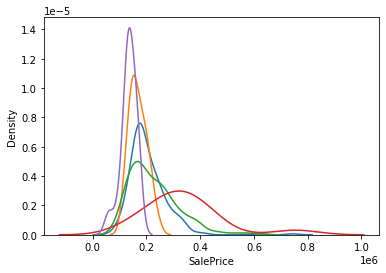

In [98]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

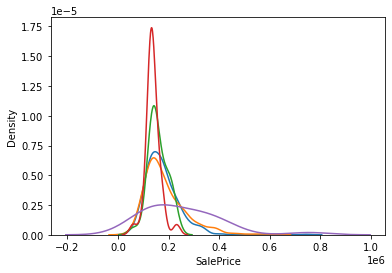

In [99]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

**Conclusion:** As we can see, for the column FireplaceQu_imputed as the values are missing around 47% using random sample imputation is not a good idea becauseit is change the overall structure of the data but looks good for the column GarageQual the overall structure is not much change.